### Notebook Setup (Imports and Declarations)

In [43]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
FLOAT_PATTERN = r"^-?\d+\.\d+$"

TEAM_DICT = {'CSK' : 'Chennai Super Kings',
              'DC' : 'Delhi Capitals',
              'GT' : 'Gujarat Titans',
              'KKR' : 'Kolkata Knight Riders',
              'LSG' : 'Lucknow Super Giants',
              'MI' : 'Mumbai Indians',
              'PBKS' : 'Punjab Kings',
              'RCB' : 'Royal Challengers Bengaluru',
              'RR' : 'Rajasthan Royals',
              'SRH' : 'Sunrisers Hyderabad'
              }

### Data : Auction 2025

In [108]:
auction25 = pd.read_csv("../data/kaggle/auction_2025/ipl_2025_auction_players.csv")
auction25["sold_status"] = auction25["Sold"].apply(lambda x : "sold" if re.match(FLOAT_PATTERN, x) else x)

auction25.head(3)


,Players,Team,Type,Base,Sold,sold_status
0,Virat Kohli,RCB,BAT,-,21.00,sold
1,Rajat Patidar,RCB,BAT,-,11.00,sold
2,Yash Dayal,RCB,BOWL,-,5.00,sold


In [109]:
auction25.groupby(["sold_status", "Team"]).count()["Players"].reset_index().pivot(index="sold_status", columns="Team", values="Players").fillna(0)

Team,-,CSK,DC,GT,KKR,LSG,MI,PBKS,RCB,RR,SRH
sold_status,,,,,,,,,,,
TBA,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unsold,102.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sold,0.0,25.0,23.0,25.0,21.0,23.0,23.0,25.0,22.0,20.0,20.0


**Note:**
- DC has one extra sold player: "Harry Brook"
- Unsold in LSG has been verified to be sold
- It would probably be a good idea to make above changes and keep sold player's info as it is the final squad.

In [110]:
# modifications required after data verification

auction25 = auction25[auction25["Players"]!="Harry Brook"].copy()

auction25["Sold"] = auction25.apply(lambda x: "0.3" if (x["Team"]=="LSG" and x["Sold"]=="Unsold") else x["Sold"], axis=1)
auction25["sold_status"] = auction25["Sold"].apply(lambda x : "sold" if re.match(FLOAT_PATTERN, x) else x)

auction25.groupby(["sold_status", "Team"]).count()["Players"].reset_index().pivot(index="sold_status", columns="Team", values="Players").fillna(0)

Team,-,CSK,DC,GT,KKR,LSG,MI,PBKS,RCB,RR,SRH
sold_status,,,,,,,,,,,
TBA,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unsold,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sold,0.0,25.0,22.0,25.0,21.0,24.0,23.0,25.0,22.0,20.0,20.0


In [111]:
auction25_cleaned = auction25[auction25["sold_status"]=="sold"].drop("sold_status", axis=1).astype({"Sold":float}).copy()
print("Auction Data(original and cleaned) : ", auction25.shape, auction25_cleaned.shape)
auction25_cleaned.head(3)

Auction Data(original and cleaned) :  (622, 6) (227, 5)


,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.0
1,Rajat Patidar,RCB,BAT,-,11.0
2,Yash Dayal,RCB,BOWL,-,5.0


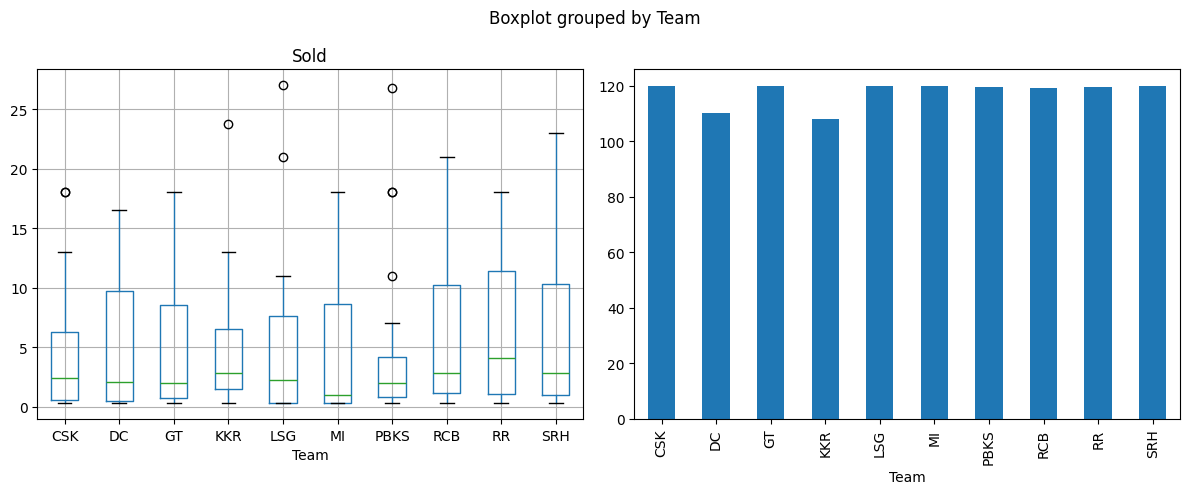

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

auction25_cleaned.boxplot(column="Sold", by="Team", ax=ax[0])

auction25_cleaned.groupby("Team")["Sold"].sum().plot.bar(ax=ax[1])

plt.tight_layout()
plt.show()

In [113]:
auction25_cleaned["Team_Name"] = auction25_cleaned["Team"].apply(lambda x: TEAM_DICT.get(x))
auction25_cleaned.head(3)

,Players,Team,Type,Base,Sold,Team_Name
0,Virat Kohli,RCB,BAT,-,21.0,Royal Challengers Bengaluru
1,Rajat Patidar,RCB,BAT,-,11.0,Royal Challengers Bengaluru
2,Yash Dayal,RCB,BOWL,-,5.0,Royal Challengers Bengaluru


In [115]:
auction25_cleaned.to_csv("../data/processed/auction25.csv", index=False)

### Data : Matches